<a href="https://colab.research.google.com/github/AlanMarquesRocha/t03_ica_cnn/blob/master/ica_t03_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Programa de Pós-Graduação em Engenharia Elétrica e de Computação (PPGEEC)**
### **Ingeligência Computacional Aplicada (ICA)**
### **Trabalho 03 - Redes Neurais Convolucionais (CNN)**
### **Discente: Alan Marques da Rocha**

---

# **Implementation of a Convolutional Neural Network (CNN) for Image Classification**

## **1st Step: Importing the Libraries needed for the Project**

In [ ]:
# Libraries that will import classes, functions and methods from CNN
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# data import libraries
import pandas as pd
import numpy as np

# libraries for graph plotting
from matplotlib import pyplot as plt
import seaborn as sns

# for generation and random values
import random

tf.__version__

# to show the proposed model metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## **2nd Step: Loading the database**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the training base:
fashion_train_df = pd.read_csv('/content/drive/MyDrive/_ppgeec_mestrado/2022_2/_disciplinas_semestrais/inteligencia_computacional_aplicada/trabalhos/trabalho03/dataset/fashion-mnist-train.csv', sep = ',')

# Importing the test base:
fashion_test_df = pd.read_csv('/content/drive/MyDrive/_ppgeec_mestrado/2022_2/_disciplinas_semestrais/inteligencia_computacional_aplicada/trabalhos/trabalho03/dataset/fashion-mnist-test.csv', sep = ',')


## **3rd Step: Data visualization and manipulation**

In [ ]:
# Showing project training data:
fashion_train_df.head()

# shows the final 5 lines of the base:
# fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Converting training and testing variable values ​​to float
training = np.array(fashion_train_df, dtype = 'float32')

testing = np.array(fashion_test_df, dtype = 'float32')

In [ ]:
# Showing data after conversion:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### **3.1 - Information about project classes:**

The data set has 10 distinct classes, namely:

- [0]: T-shirt/top
- [1]: Trouser
- [2]: Pullover
- [3]: Dress
- [4]: Coat
- [5]: Sandal
- [6]: Shirt
- [7]: Sneaker
- [8]: Bag
- [9]: Ankle boot


#### **3.1.1: Showing the division graph of the classes in the training set**

In [ ]:
# Division of classes in the training set:
fashion_train_df['label'].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

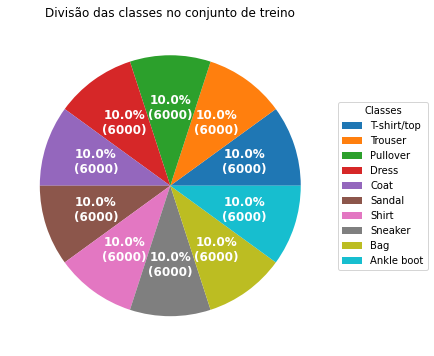

In [ ]:
# Area that plots the graph and defines its size
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw = dict(aspect="equal"))

# Class information
recipe = ["T-shirt/top", "Trouser", "Pullover", 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# The amount of data is reported
data_class = [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]

# Shows the percentage of each class in the dataset
def func(pct, allvals):
    # calc %
    absolute = int(pct/100.*np.sum(allvals))
    # fazendo legenda do gráfico
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating the chart and placing the inner legend function
wedges, texts, autotexts = ax.pie(data_class, autopct = lambda pct: func(pct, data_class),
                                  textprops=dict(color = "w"))

# Defining the external caption box, title, location and where to 'anchor the box'
ax.legend(wedges, recipe,
          title="Classes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Here we set the text size from within the graphic, and the font weight to bold
plt.setp(autotexts, size=12, weight="bold")

# chart title
ax.set_title("Divisão das classes no conjunto de treino")

# showing the chart
plt.show()

##### **3.1.2: Showing the division graph of the classes in the test set**

In [ ]:
# Division of classes in the test set:
fashion_test_df['label'].value_counts()

0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64

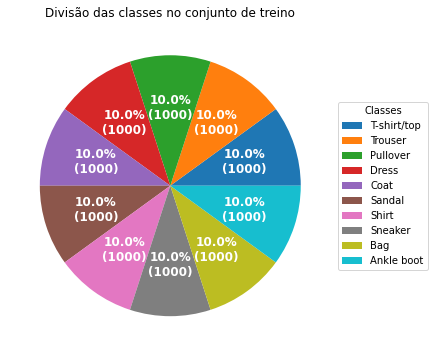

In [ ]:
# Area that plots the graph and defines its size
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw = dict(aspect="equal"))

# Class information
recipe = ["T-shirt/top", "Trouser", "Pullover", 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# The amount of data is reported
data_class = [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

# Shows the percentage of each class in the dataset
def func(pct, allvals):
    # calc %
    absolute = int(pct/100.*np.sum(allvals))
    # fazendo legenda do gráfico
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating the chart and placing the inner legend function
wedges, texts, autotexts = ax.pie(data_class, autopct = lambda pct: func(pct, data_class),
                                  textprops=dict(color = "w"))

# Defining the external caption box, title, location and where to 'anchor the box'
ax.legend(wedges, recipe,
          title="Classes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Here we set the text size from within the graphic, and the font weight to bold
plt.setp(autotexts, size=12, weight="bold")

# chart title
ax.set_title("Divisão das classes no conjunto de treino")

# showing the chart
plt.show()

valor de i:  5242


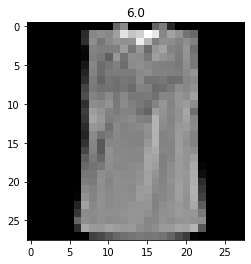

In [ ]:
# Displaying a random image of the dataset:
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape((28, 28)), cmap = 'gray');
plt.title(training[i, 0]);
print('valor de i: ', i)

#### **3.2: Introducing some examples of images from the training set**

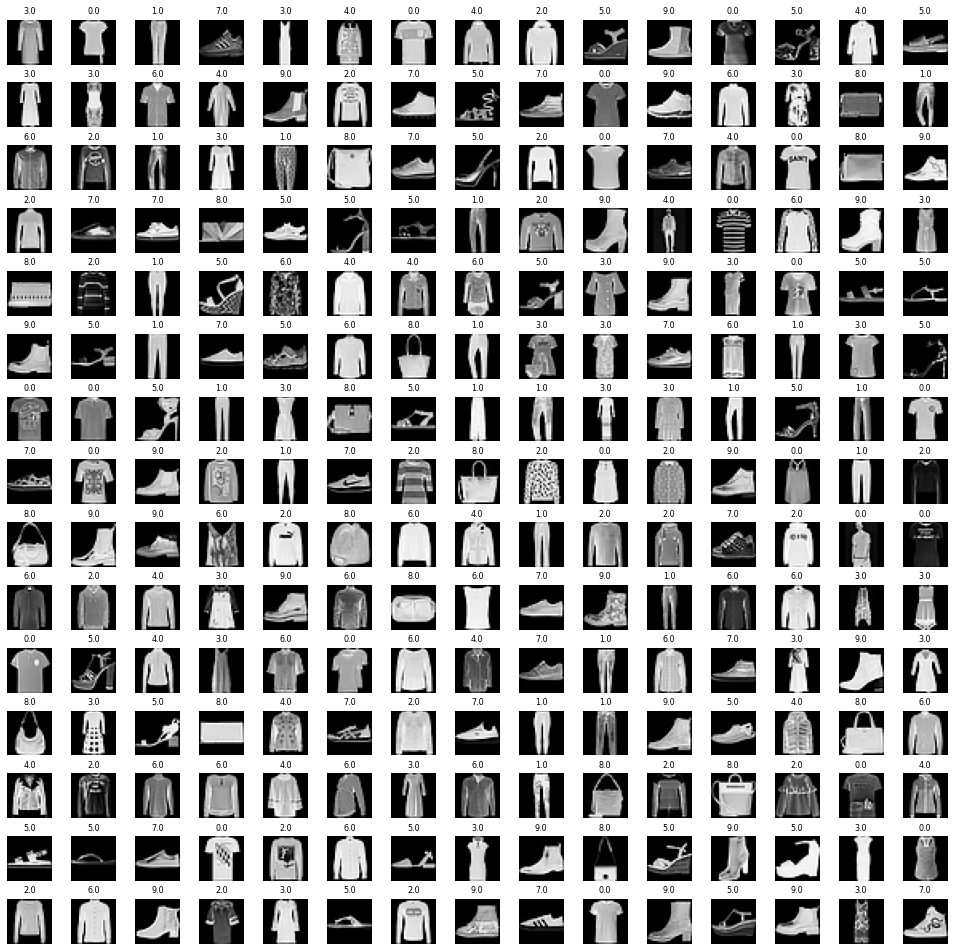

In [ ]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training[index,1:].reshape((28,28)), cmap = 'gray')
  axes[i].set_title(training[index,0], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

#### **3.3: Database treatment**

Realiza-se a normalização dos dados, deixando-os entre ``(0 e 1)``

In [ ]:
# Training set normalization
conv_train = training[:, 1:] / 255

# Test set normalization
conv_test = testing[:, 1:] / 255

In [ ]:
# shows a portion of the normalized training data:
conv_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# shows a portion of the normalized test data:
conv_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.        ],
       [0.        , 0.00392157, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

##### **3.3.1: Defining the training and test sets for the CNN network**.

In [ ]:
# Training set:
X_train = conv_train
y_train = training[:, 0]

# Test set:
X_test = conv_test
y_test = testing[:, 0]

##### **3.3.2: Defining the size of the batch that will feed CNN**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], * (28,28, 1))

X_test = X_test.reshape(X_test.shape[0], * (28,28, 1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

## **4th Step: Construction of the CNN model**

The ``Sequential()`` model provides CNN's training and inference capabilities.

Convolution and pooling layers are added using the ``add`` method.

Four methods are used to build the CNN, namely: ``layers.Conv2D``, ``layers.MaxPooling2D``, ``layers.Flatten`` and ``layers.Dense``. The main attributes of each method will be presented below:


### **4.1 Characteristics of CNN methods**

**``tf.keras.layers.Conv2D``**(<br>
    ``filters``: Determines the number of output filters in the convolution).<br>
    ``kernel_size``: Specifies the height and width of the 2D convolution window; <br>
    ``strides``: Specifies the convolution steps along the height and width;<br>
    ``padding``: Complements the filling of the image, in case the stride exceeds the dimensions;<br>
    ``activation``: Activation function to use. <br>

Types of activation functions can be checked [here.](https://www.tensorflow.org/api_docs/python/tf/keras/activations)

---

**``tf.keras.layers.MaxPool2D``**(<br>
    ``pool_size``: Size of the analysis window for pixels, returning the maximum value;<br>
    ``strides``: Step values. Specifies how far the nesting window moves for each nesting step;<br>
    ``padding``: Complements the padding of the image, in case the stride exceeds the dimensions. <br>
🇧🇷

---

**``tf.keras.layers.Flatten( )``**: Does not receive any parameter. It is responsible for converting the feature matrix of the last layer of CNN to a vector that will be applied in the input layer of the classifier.

---

**``tf.keras.layers.Dense``**(<br>
    ``units``: Positive integer, output space dimensionality.<br>
    ``activation``: Activation function to be used (Ex: ``softmax``)<br>
    ``use_bias``: <br>
🇧🇷

### **4.2 Convolutional Neural Network Implementation**

In [ ]:
# number of filters for each convolution layer (filters)
c_entrada = [64, 32]

# number of neurons in fully connected layers:
c_dense = [120, 120, 10]

# defining the kernel:
kernel = (3, 3)

# kernel_in = np.array([[0, 0, 0],
#                      [0, 1, 0],
#                      [0, 0, 0]])

# kernel = tf.constant(kernel_in, dtype=tf.float32)

# convolution steps (stride)
strd = 1

# defining the activation function of the convolution layers:
act_func = 'relu'

# setting the cnn classifier activation function
act_func_class = 'softmax'

# starting the model
cnn_2 = models.Sequential()


# 1st CNN convolution layer
cnn_2.add(layers.Conv2D(c_entrada[0], kernel, strd, activation = act_func, input_shape=(28, 28, 1)))
# 1st CNN Pooling layer (maximum pooling applies)
cnn_2.add(layers.MaxPooling2D((2,2), padding = 'same'))


# 2st CNN convolution layer
cnn_2.add(layers.Conv2D(c_entrada[1], kernel, strd, activation = act_func))
# 2st CNN Pooling layer (maximum pooling applies)
cnn_2.add(layers.MaxPooling2D((2, 2), padding = 'same'))


# Conversion of attribute matrix to attribute vector
cnn_2.add(layers.Flatten())


# 1st layer fully connected:
cnn_2.add(layers.Dense(c_dense[0], activation = act_func))
# 2st layer fully connected:
cnn_2.add(layers.Dense(c_dense[1], activation = act_func))

# Last layer of classifier with softmax activation function.
cnn_2.add(layers.Dense(c_dense[2], activation = act_func_class))

cnn_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                                 
 dense_9 (Dense)             (None, 120)              

## **5th Step: Model Training**

In [ ]:
cnn_2.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',
            metrics = ['accuracy'])

In [ ]:
# definindo o número de épocas
epochs = 200

# showing the network training loss and accuracy at each epoch
history = cnn_2.fit(X_train, y_train, batch_size = 1024, epochs = epochs)

Epoch 1/200
59/59 [==============================] - 3s 26ms/step - loss: 0.9653 - accuracy: 0.6792
Epoch 2/200
59/59 [==============================] - 1s 24ms/step - loss: 0.5227 - accuracy: 0.8030
Epoch 3/200
59/59 [==============================] - 1s 24ms/step - loss: 0.4357 - accuracy: 0.8440
Epoch 4/200
59/59 [==============================] - 1s 23ms/step - loss: 0.3921 - accuracy: 0.8603
Epoch 5/200
59/59 [==============================] - 1s 23ms/step - loss: 0.3617 - accuracy: 0.8709
Epoch 6/200
59/59 [==============================] - 1s 24ms/step - loss: 0.3382 - accuracy: 0.8794
Epoch 7/200
59/59 [==============================] - 1s 24ms/step - loss: 0.3202 - accuracy: 0.8866
Epoch 8/200
59/59 [==============================] - 2s 26ms/step - loss: 0.3050 - accuracy: 0.8908
Epoch 9/200
59/59 [==============================] - 2s 28ms/step - loss: 0.2956 - accuracy: 0.8946
Epoch 10/200
59/59 [==============================] - 1s 23ms/step - loss: 0.2816 - accuracy: 0.8992

## **6th Step: Proposed CNN Model Evaluation**

In [ ]:
test_loss, evaluation = cnn_2.evaluate(X_test, y_test, verbose = 2);

print('\nAcurácia do teste atual: ', evaluation)

313/313 - 1s - loss: 0.7659 - accuracy: 0.9261 - 865ms/epoch - 3ms/step

Acurácia do teste atual:  0.9261000156402588


In [ ]:
# some examples of network layers and their respective accuracies

# conv[64, 64]
# Current test accuracy:  0.912

# conv[64, 32]
# dense[120, 120, 10]
# Current test accuracy:  0.92

# conv[64, 32]
# dense[120, 120, 10]
# kernel (3,3)
# batch_size: 1024
# Current test accuracy:  0.9261000156402588

In [ ]:
evaluation

0.9261000156402588

313/313 [==============================] - 1s 2ms/step


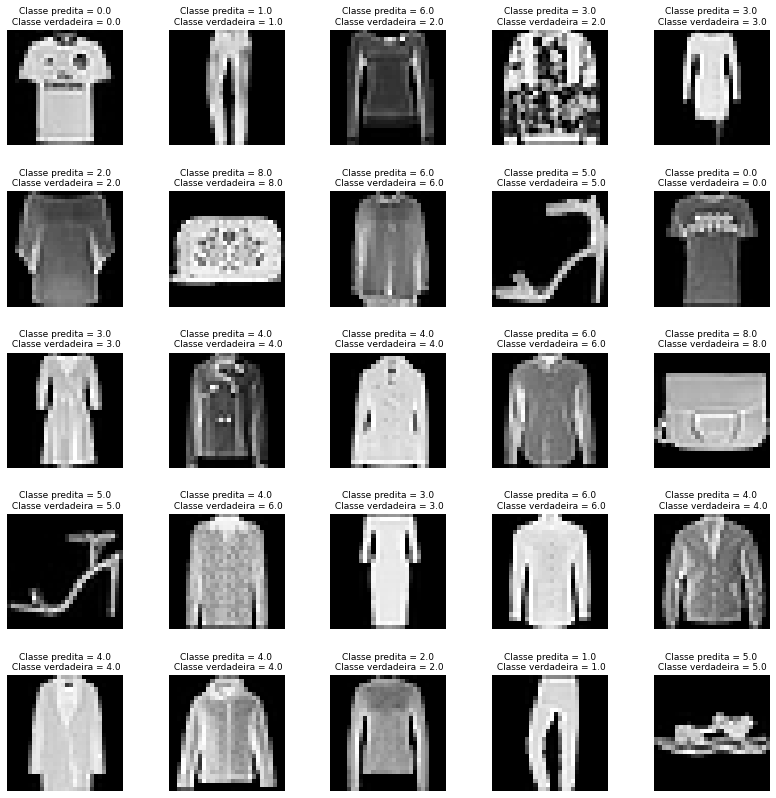

In [ ]:
# Showing some examples of correctly and incorrectly predicted classes

predict_x = cnn_2.predict(X_test) 
predicted_classes = np.argmax(predict_x, axis = 1)

W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (14,14))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
  axes[i].imshow(X_test[i].reshape((28,28)), cmap = 'gray')
  axes[i].set_title("predicted class = {:0.1f}\n true class = {:0.1f}".format(predicted_classes[i], y_test[i]), fontsize = 9)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### **6.1 Showing the Confusion Matrix (CM) and other metrics of the Proposed Model**

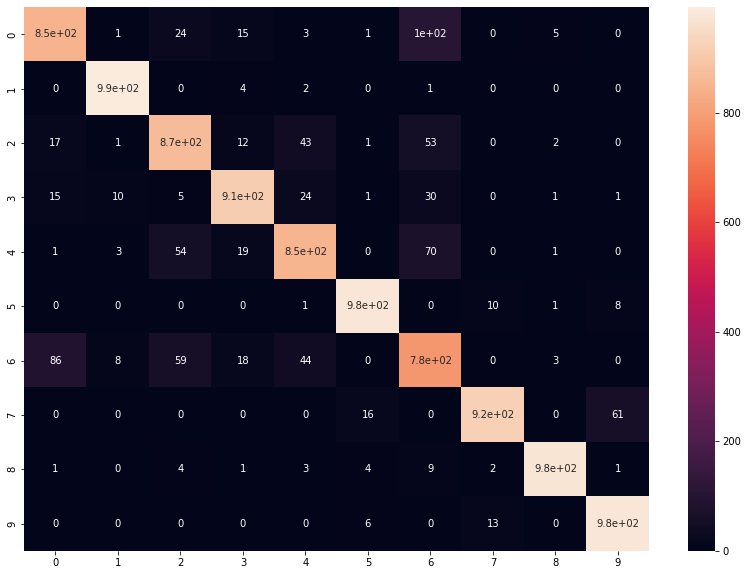

In [ ]:
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10));
sns.heatmap(cm, annot=True)

In [ ]:
# presenting the confusion matrix in tabular form
cm

array([[848,   1,  24,  15,   3,   1, 103,   0,   5,   0],
       [  0, 993,   0,   4,   2,   0,   1,   0,   0,   0],
       [ 17,   1, 871,  12,  43,   1,  53,   0,   2,   0],
       [ 15,  10,   5, 913,  24,   1,  30,   0,   1,   1],
       [  1,   3,  54,  19, 852,   0,  70,   0,   1,   0],
       [  0,   0,   0,   0,   1, 980,   0,  10,   1,   8],
       [ 86,   8,  59,  18,  44,   0, 782,   0,   3,   0],
       [  0,   0,   0,   0,   0,  16,   0, 923,   0,  61],
       [  1,   0,   4,   1,   3,   4,   9,   2, 975,   1],
       [  0,   0,   0,   0,   0,   6,   0,  13,   0, 981]])

In [ ]:

# Show the accuracy, recall and f1-score of each class for the test set
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
target_names;

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.85      0.86      1000
     Class 1       0.98      0.99      0.99      1000
     Class 2       0.86      0.87      0.86      1000
     Class 3       0.93      0.91      0.92      1000
     Class 4       0.88      0.85      0.86      1000
     Class 5       0.97      0.98      0.98      1000
     Class 6       0.75      0.78      0.76      1000
     Class 7       0.97      0.92      0.95      1000
     Class 8       0.99      0.97      0.98      1000
     Class 9       0.93      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

